### Read in RMSE data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
df = pd.DataFrame(pd.read_csv("rmse_cos1.txt", sep=" "))
#df=df[df['lengthscale']<=0.3]
df.shape

(400, 4)

### Make data frame in order

In [16]:
order = pd.DataFrame(pd.read_csv("rmse_cos.txt", sep=" "))
order = order.sort_values(by=['lengthscale', 'l2regularizer'])
order = order.reset_index(drop=True)
with open("rmse_cos1.txt", 'a') as f:
    dfAsString = order.to_string(header=False, index=False)
    f.write(dfAsString)
order

,lengthscale,l2regularizer,rmse_mean,rmse_std
0,0.05,0.05,1.061838,0.437720
1,0.05,0.10,1.057113,0.491299
2,0.05,0.15,1.109090,0.567120
3,0.05,0.20,1.141997,0.488324
4,0.05,0.25,1.094974,0.660787
...,...,...,...,...
395,1.00,0.80,1.080845,0.487867
396,1.00,0.85,1.072294,0.524478
397,1.00,0.90,1.054262,0.481173
398,1.00,0.95,1.083448,0.502309


In [26]:
#find the missing one
# for i in np.unique(df['lengthscale']):
#     #print exact lengthscale dataframe's shape
#     print(df[df['lengthscale']==i].shape)
print(df[df['lengthscale']==0.8])

     lengthscale  l2regularizer  rmse_mean  rmse_std
300          0.8           0.05   1.135891  0.592522
301          0.8           0.10   0.936726  0.486916
302          0.8           0.15   1.114499  0.509632
303          0.8           0.20   1.112676  0.450098
304          0.8           0.25   1.103356  0.616480
305          0.8           0.30   1.102330  0.524709
306          0.8           0.35   1.165753  0.552435
307          0.8           0.40   1.079257  0.450239
308          0.8           0.45   1.061147  0.561305
309          0.8           0.50   1.034560  0.484052
310          0.8           0.55   1.063785  0.522664
311          0.8           0.60   1.134637  0.596255
312          0.8           0.65   1.018709  0.523268
313          0.8           0.70   1.087953  0.548125
314          0.8           0.75   1.154959  0.555120
315          0.8           0.80   1.033946  0.434387
316          0.8           0.85   1.098047  0.528254
317          0.8           0.90   1.179181  0.

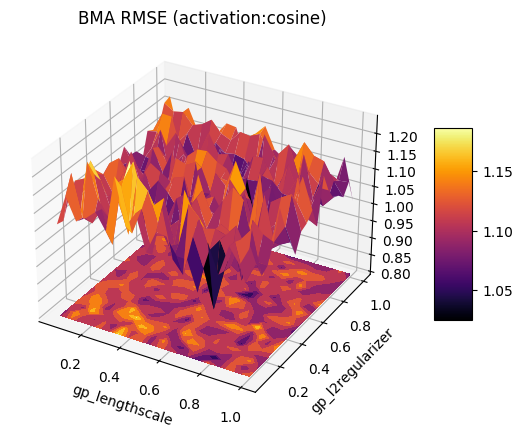

In [19]:
fig = plt.figure(figsize= (10,5))
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.8, np.max(rmse_mean_plot))
# show plot
plt.show()

In [20]:
df[df['rmse_mean']==np.min(df['rmse_mean'])]

,lengthscale,l2regularizer,rmse_mean,rmse_std
301,0.8,0.1,0.936726,0.486916


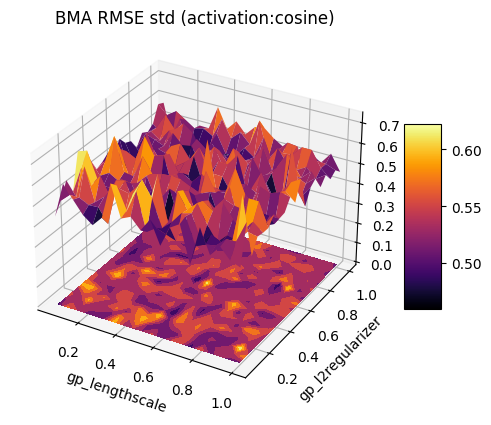

In [21]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

In [22]:
df = pd.DataFrame(pd.read_csv("bma_relu_rmse.txt", sep=" "))
df.shape

(1560, 4)

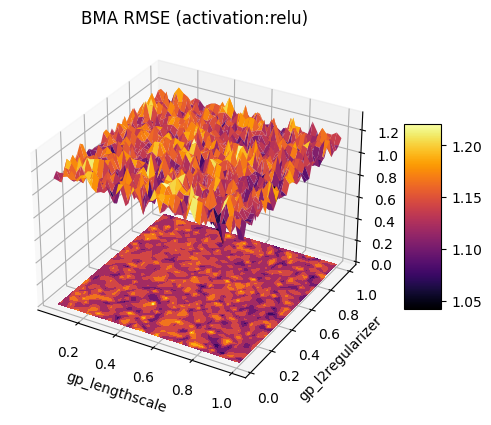

In [23]:
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:relu)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()

In [ ]:
df[df['rmse_mean']==np.min(df['rmse_mean'])]

In [50]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:relu)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

<IPython.core.display.Javascript object>